### Introduction

Here you'll learn to build models using Catboost, Lightgbm and NaiveBayes algorithm in Python. Given the text classification problem, you'll also learn to clean data, create bag of words matrix, tf-idf matrix. 

On top of what's done here, next you can create a simple voting ensemble from the predictions generated from these models here.

In [186]:
# Load Libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer, roc_curve, auc

pd.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [187]:
# load data
train = pd.read_csv("Dataset/mushroom_train.csv")
test = pd.read_csv("Dataset/mushroom_test.csv")

#Create a new function:
def num_missing(x):
    return sum(x.isnull())

In [188]:
cols = train.columns.tolist()
cols.remove('radius')
cols.remove('weight')

for col in cols:
    print (col, ": ", train[col].unique())

class :  ['p' 'e']
cap-shape :  ['f' 'x' 'b' 'k' 's' 'c']
cap-surface :  ['s' 'y' 'f' 'g']
cap-color :  ['e' 'w' 'n' 'y' 'g' 'b' 'p' 'r' 'u' 'c']
bruises :  ['f' 't']
odor :  ['s' 'p' 'n' 'y' 'l' 'f' 'c' 'm' 'a']
gill-attachment :  ['f' 'a']
gill-spacing :  ['c' 'w']
gill-size :  ['n' 'b']
gill-color :  ['b' 'k' 'e' 'n' 'h' 'p' 'u' 'g' 'w' 'y' 'o' 'r']
stalk-shape :  ['t' 'e']
stalk-root :  ['?' 'e' 'c' 'b' 'r']
stalk-surface-above-ring :  ['s' 'k' 'f' 'y']
stalk-surface-below-ring :  ['k' 's' 'f' 'y']
stalk-color-above-ring :  ['p' 'w' 'e' 'g' 'b' 'c' 'n' 'o' 'y']
stalk-color-below-ring :  ['w' 'e' 'n' 'p' 'b' 'g' 'c' 'o' 'y']
veil-type :  ['p']
veil-color :  ['w' 'o' 'n' 'y']
ring-number :  ['o' 't' 'n']
ring-type :  ['e' 'p' 'l' 'f' 'n']
spore-print-color :  ['w' 'n' 'h' 'k' 'u' 'o' 'b' 'y' 'r']
population :  ['v' 'c' 's' 'y' 'a' 'n']
habitat :  ['l' 'u' 'w' 'm' 'g' 'd' 'p']


In [189]:
cols = test.columns.tolist()
cols.remove('radius')
cols.remove('weight')

for col in cols:
    print (col, ": ", test[col].unique())

cap-shape :  ['x' 'b' 'f' 'k' 's']
cap-surface :  ['f' 'y' 's']
cap-color :  ['g' 'w' 'y' 'p' 'n' 'e' 'r' 'b' 'c' 'u']
bruises :  ['t' 'f']
odor :  ['n' 'f' 'a' 'c' 'y' 'l' 's' 'p' 'm']
gill-attachment :  ['f' 'a']
gill-spacing :  ['c' 'w']
gill-size :  ['b' 'n']
gill-color :  ['u' 'g' 'w' 'p' 'h' 'n' 'b' 'e' 'k' 'r' 'y' 'o']
stalk-shape :  ['t' 'e']
stalk-root :  ['b' 'c' '?' 'e' 'r']
stalk-surface-above-ring :  ['s' 'k' 'f' 'y']
stalk-surface-below-ring :  ['s' 'k' 'f' 'y']
stalk-color-above-ring :  ['p' 'b' 'w' 'n' 'o' 'e' 'g' 'c']
stalk-color-below-ring :  ['g' 'b' 'w' 'o' 'p' 'n' 'e' 'c' 'y']
veil-type :  ['p']
veil-color :  ['w' 'o' 'n']
ring-number :  ['o' 't' 'n']
ring-type :  ['p' 'l' 'e' 'f' 'n']
spore-print-color :  ['k' 'h' 'n' 'b' 'w' 'r' 'u' 'o' 'y']
population :  ['y' 'v' 's' 'n' 'a' 'c']
habitat :  ['d' 'm' 'l' 'u' 'g' 'p' 'w']


In [190]:
train['stalk-root'].value_counts()

b    2665
?    1727
e     780
c     382
r     132
Name: stalk-root, dtype: int64

In [191]:
test['stalk-root'].value_counts()

b    1111
?     753
e     340
c     174
r      60
Name: stalk-root, dtype: int64

In [192]:
#train.head()
#test.head()

In [193]:
print ("Train length: ", len(train))
print ("Test  length: ", len(test))

Train length:  5686
Test  length:  2438


In [194]:
#train.dtypes, test.dtypes

In [195]:
test['class'] = np.nan

In [196]:
# label encode categorical features in data given
cols = train.columns.tolist()
cols.remove("class")
cols.remove("radius")
cols.remove("weight")
print (len(cols))

22


In [197]:
# label encode categorical features in data given

for col in cols:
    lbl = LabelEncoder()
    train[col] = lbl.fit_transform(train[col])
    test[col] = lbl.transform(test[col])
    if col == 'stalk-root':
        print (lbl.classes_)

['?' 'b' 'c' 'e' 'r']


In [198]:
train['stalk-root'].value_counts()

1    2665
0    1727
3     780
2     382
4     132
Name: stalk-root, dtype: int64

In [199]:
test['stalk-root'].value_counts()

1    1111
0     753
3     340
2     174
4      60
Name: stalk-root, dtype: int64

In [200]:
# Replace the '?' with NaN values
train['stalk-root'].replace(0, np.nan, inplace=True)
test['stalk-root'].replace(0, np.nan, inplace=True)

In [201]:
from scipy.stats import mode
# impute the missing values with 'mode'
train['stalk-root'].fillna(mode(train['stalk-root']).mode[0], inplace=True)
test['stalk-root'].fillna(mode(test['stalk-root']).mode[0], inplace=True)

In [202]:
train['stalk-root'].value_counts()

1.0    4392
3.0     780
2.0     382
4.0     132
Name: stalk-root, dtype: int64

In [203]:
train['stalk-root'].unique()

array([ 1.,  3.,  2.,  4.])

In [204]:
print ("Missing values per column: ")
print (train.apply(num_missing, axis=0))

Missing values per column: 
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
radius                      0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
weight                      0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [205]:
print ("Missing values per column: ")
print (test.apply(num_missing, axis=0))

Missing values per column: 
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                     0
radius                         0
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
weight                         0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
class                       2438
dtype: int64


In [206]:
train.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,p,2,2,2,0,7,1,0,1,0,1,1.0,215,2,1,6,7,0,2,38,1,0,7,4,2
1,p,5,3,8,1,6,1,0,1,4,0,3.0,94,2,2,7,7,0,2,43,1,4,3,4,5
2,e,2,2,4,1,5,1,0,0,1,0,1.0,244,2,2,2,2,0,2,37,2,0,7,1,6
3,p,5,2,2,0,8,1,0,1,0,1,1.0,286,1,2,6,7,0,2,82,1,0,7,4,2
4,e,5,2,8,1,3,1,0,0,5,0,2.0,110,2,2,7,7,0,2,36,1,4,3,3,3


In [207]:
test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat,class
0,5,0,3,1,5,1,0,0,9,1,1.0,32,2,2,6,3,0,2,23,1,4,2,5,0,NaN
1,5,3,3,0,2,1,0,0,2,0,1.0,7,1,1,0,0,0,2,23,1,2,1,4,0,NaN
2,0,2,8,1,0,1,0,0,10,0,2.0,2,2,2,7,7,0,2,24,1,4,2,3,3,NaN
3,2,3,9,0,2,1,0,0,7,0,1.0,2,1,1,4,0,0,2,53,1,2,1,5,0,NaN
4,0,3,9,1,0,1,0,0,10,0,2.0,10,2,2,7,7,0,2,24,1,4,2,2,3,NaN


In [208]:
### set target variable

train['class'] = [1 if x == 'p' else 0 for x in train['class']]

### feature

In [209]:
#train.drop(['veil-type'], axis = 1, inplace = True)
#test.drop(['veil-type'], axis = 1, inplace = True)

In [210]:
cols = train.columns.tolist()
cols.remove('class')

x = (train.drop(['class', 'veil-type'], axis=1)).as_matrix()
xtest = (test.drop(['class', 'veil-type'], axis=1)).as_matrix()

y = train['class'].as_matrix()

In [211]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=scaler.fit_transform(x)

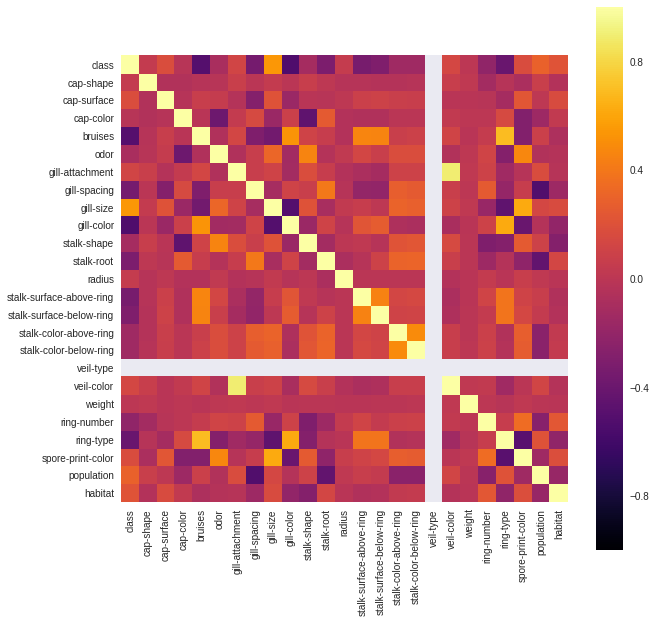

In [212]:
import seaborn as sns
plt.figure(figsize = (10,10))
sns.heatmap(train.corr(), cmap = 'inferno',square=True)
plt.show()

### visualisation

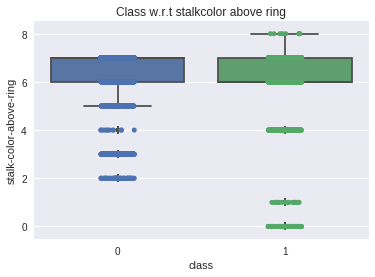

In [213]:
ax = sns.boxplot(x='class', y='stalk-color-above-ring', data=train)
ax = sns.stripplot(x="class", y='stalk-color-above-ring',
                   data=train, jitter=True,
                   edgecolor="gray")
sns.plt.title("Class w.r.t stalkcolor above ring",fontsize=12)

### pca

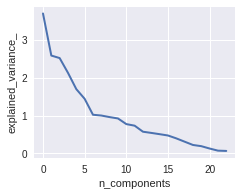

In [214]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pca = PCA()

# Plot the PCA spectrum
pca.fit(x)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_,  linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

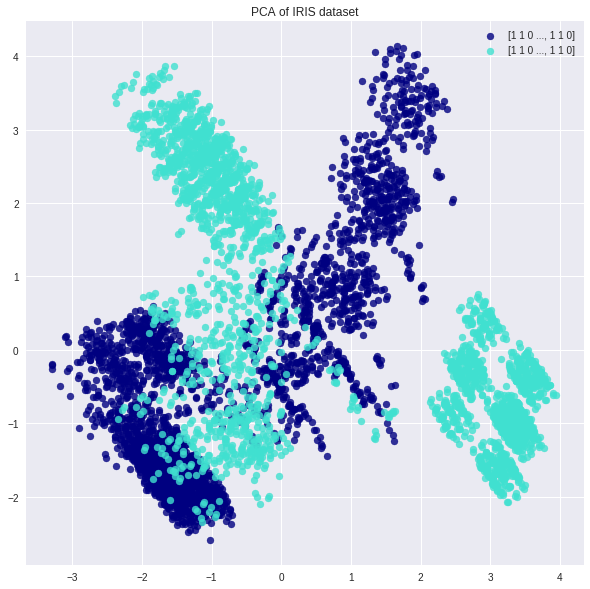

In [215]:
pca = PCA(n_components=2)
pca_x = pca.fit_transform(x)

colors = ['navy', 'turquoise']
plt.figure(figsize = (10,10))
for color, i, target_name in zip(colors, [0, 1], y):
    plt.scatter(pca_x[y == i, 0], pca_x[y == i, 1], color=color, alpha=.8,label=y)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

In [216]:
cols = train.columns.tolist()
cols.remove('class')

### Various Models

In [217]:
def plot_decision_boundary(clf, x, y):
    plot_step = 0.1
    
    plt.figure(figsize = (10,10))
    if x.shape[1] != 2:
        raise ValueError("X should have exactly 2 columns")
        
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(x_min, x_max, plot_step))
    
    clf.fit(x, y)
    if hasattr(clf, 'predict_proba'):
        z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    else:
        z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        
    z = z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, z, cmap=plt.cm.Reds)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired)
    plt.show()

In [218]:
def plot_feature_importance(clf, cols):
    plt.figure(figsize = (10,10))
    
    imp = clf.feature_importances_
    
    imp, cols = zip(*sorted(zip(imp, cols)))
    plt.barh(range(len(cols)), imp, align='center')
    
    plt.yticks(range(len(cols)), cols)
    plt.xlabel("Importance of features")
    plt.ylabel("Feautures")
    plt.title("Importance of each feature")
    
    plt.show()

In [219]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

print("Cross-Val Score", cross_val_score(clf, x, y, cv=5, scoring=make_scorer(accuracy_score)))

clf.fit(x, y)

pred = clf.predict(x)
print ("Accuracy: ", accuracy_score(y, pred))

#test_pred = clf.predict(xtest)

Cross-Val Score [ 0.97012302  0.95954266  0.96833773  0.96394019  0.96569921]
Accuracy:  0.969046781569


Cross-Val Score [ 1.  1.  1.  1.  1.]
Accuracy:  1.0


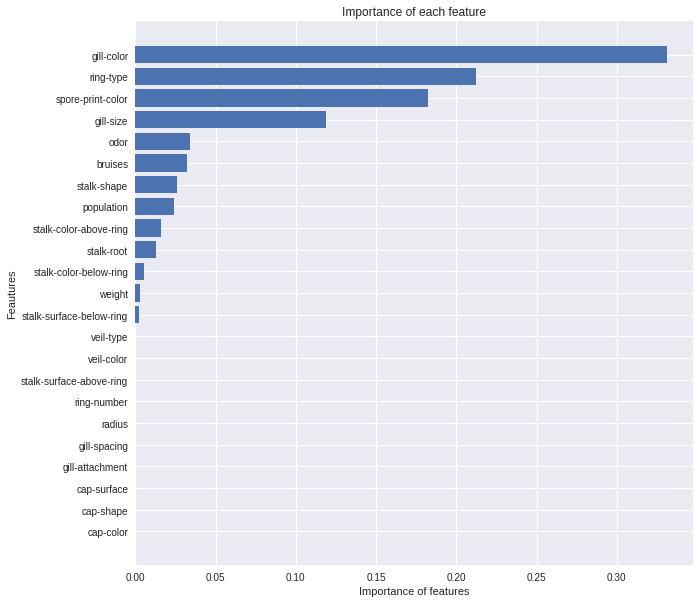

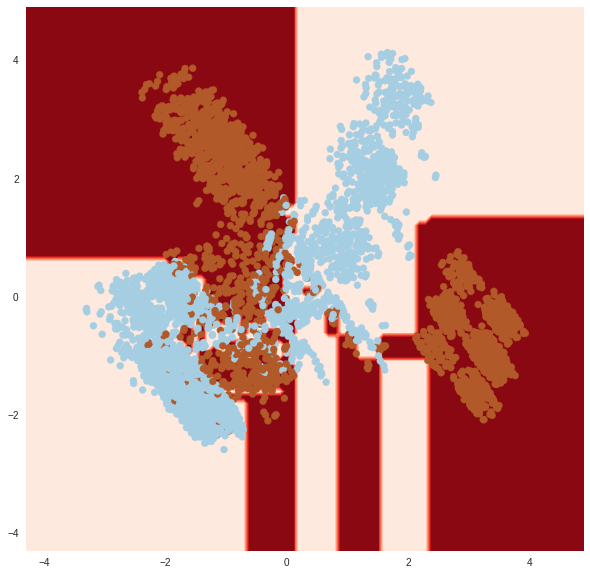

In [220]:
### Decision Trees
from sklearn import tree
clf = tree.DecisionTreeClassifier()

print("Cross-Val Score", cross_val_score(clf, x, y, cv=5, scoring=make_scorer(accuracy_score)))

clf.fit(x, y)

pred = clf.predict(x)
print ("Accuracy: ", accuracy_score(y, pred))

plot_feature_importance(clf, cols)
plot_decision_boundary(clf, pca_x, y)

#test_pred = clf.predict(xtest)

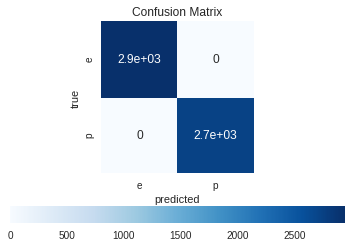

In [221]:
from sklearn.metrics import confusion_matrix, classification_report
# Confision Matrix.
cm = confusion_matrix(y, pred)

# print('\nConfusion Matrix:')
_ = sns.heatmap(cm, square = True, xticklabels = ['e', 'p'], annot = True, annot_kws = {'fontsize': 12}, 
                yticklabels = ['e', 'p'], cbar = True, cbar_kws = {"orientation": "horizontal"}, 
                cmap = "Blues").set(xlabel = "predicted", ylabel = "true", title = 'Confusion Matrix')


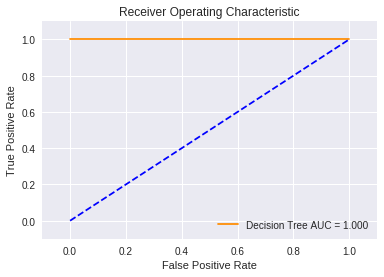

In [222]:
def roc_curve_acc(Y_test, Y_pred,method):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='darkorange',label='%s AUC = %0.3f'%(method, roc_auc))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.ylim([-0.1, 1.1])
    plt.xlim([-0.1, 1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

roc_curve_acc(y, pred, "Decision Tree")

Cross-Val Score [ 1.          0.99912049  0.99912049  1.          1.        ]
Accuracy:  0.999648258881


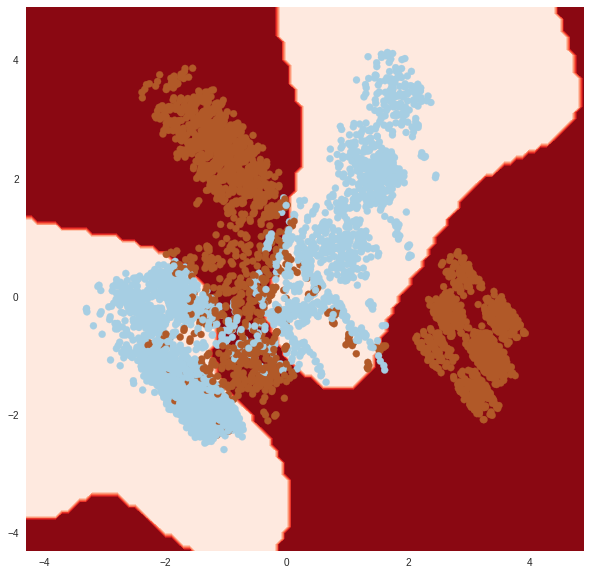

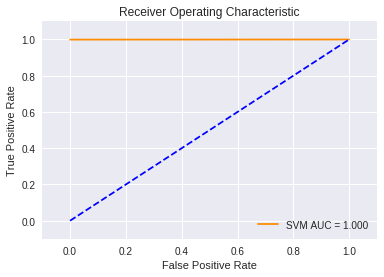

In [224]:
### SVM
from sklearn import svm
clf = svm.SVC()

print("Cross-Val Score", cross_val_score(clf, x, y, cv=5, scoring=make_scorer(accuracy_score)))

clf.fit(x, y)

pred = clf.predict(x)
print ("Accuracy: ", accuracy_score(y, pred))

plot_decision_boundary(clf, pca_x, y)
#test_pred = clf.predict(xtest)

roc_curve_acc(y, pred, "SVM")

Cross-Val Score [ 1.  1.  1.  1.  1.]
Accuracy:  1.0


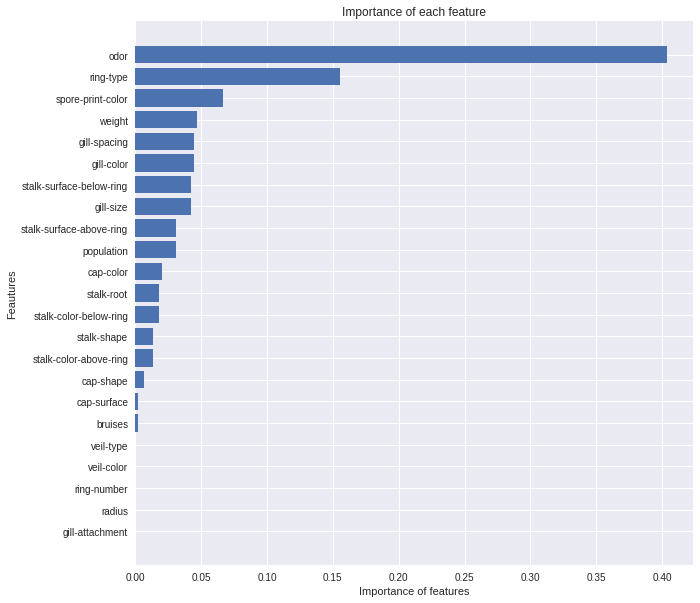

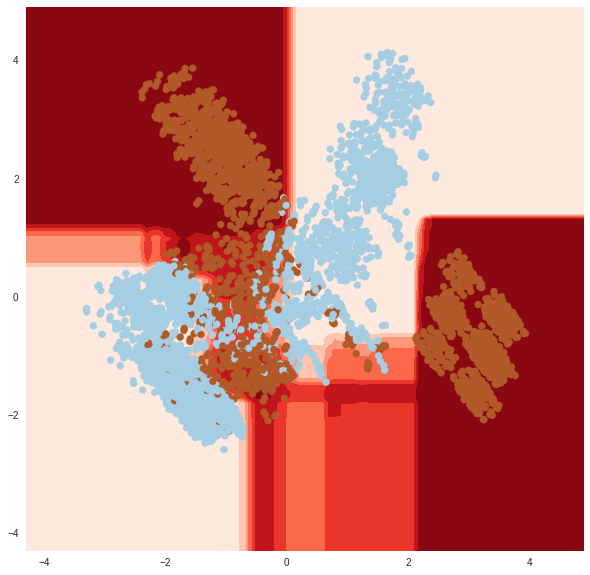

In [138]:
### XGBoost
import xgboost
clf = xgboost.XGBClassifier()

print("Cross-Val Score", cross_val_score(clf, x, y, cv=5, scoring=make_scorer(accuracy_score)))


clf.fit(x, y)

pred = clf.predict(x)
print ("Accuracy: ",accuracy_score(y, pred))

plot_feature_importance(clf, cols)
plot_decision_boundary(clf, pca_x, y)
#test_pred = clf.predict(xtest)

Cross-Val Score [ 0.90773286  0.91380827  0.9058927   0.91116974  0.89885664]
Accuracy:  0.909954273655


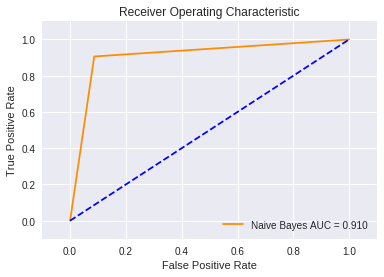

In [226]:
### Naive Baiyes
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

print("Cross-Val Score", cross_val_score(clf, x, y, cv=5, scoring=make_scorer(accuracy_score)))

#plot_decision_boundary(clf, pca_x, y)
clf.fit(x, y)

pred = clf.predict(x)
print ("Accuracy: ",accuracy_score(y, pred))

roc_curve_acc(y, pred, "Naive Bayes")
#test_pred = clf.predict(xtest)

In [ ]:
#lightGBM
#catBoost
#adaBoost
#randomForest
#extraTreeClassifier
#GBM
#MLP

In [76]:
train.columns.tolist()

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'radius',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-color',
 'weight',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

## highly distinguishing features

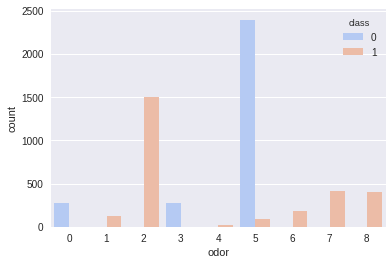

In [140]:
sns.countplot(x = 'odor', data = train, hue='class', palette='coolwarm')
plt.show()

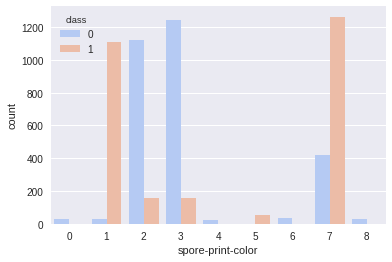

In [141]:
sns.countplot(x = 'spore-print-color', data = train, hue='class', palette='coolwarm')
plt.show()

## less distinguishing features

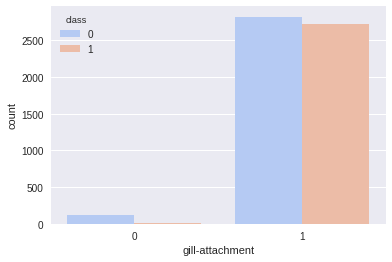

In [142]:
sns.countplot(x = 'gill-attachment', data = train, hue='class', palette='coolwarm')
plt.show()

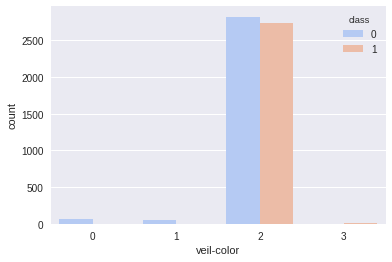

In [143]:
sns.countplot(x = 'veil-color', data = train, hue='class', palette='coolwarm')
plt.show()

# ------------------------------ END -----------------------------------